In [1]:
import pandas as pd
df=pd.read_csv('try.csv')

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
titles=df['title'].tolist()
cleaned_titles=[]
# Define the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
for text in titles:
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
      
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = " ".join(tokens)
    
    cleaned_titles.append(preprocessed_text)

# Apply preprocessing to each title in the list

# Add the cleaned titles back to the DataFrame
df['cleaned_title'] = cleaned_titles

# Display the DataFrame
df.head()

,Unnamed: 0,ticker,date,time,title,cleaned_title
0,0,AMZN,Feb-19-25,07:56AM,Amazon joins forces with Memorial Sloan Ketter...,amazon join force memorial sloan kettering aip...
1,1,AMZN,Feb-19-25,06:38AM,Amazon $100B AI Investment Stumbles Amid Suppl...,amazon b ai investment stumble amid supply hurdle
2,2,AMZN,Feb-19-25,06:14AM,Can Oracle (ORCL) Capitalize on the $500B AI S...,oracle orcl capitalize b ai stargate bonanza
3,3,AMZN,Feb-19-25,05:30AM,Better Artificial Intelligence Stock: Rigetti ...,better artificial intelligence stock rigetti c...
4,4,AMZN,Feb-19-25,05:00AM,"Amazon, Disney, Starbucks and 5 other big comp...",amazon disney starbucks big company help pay e...


In [4]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def assign_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0:
        return 'positive'
    else:
        return 'negative'    

df['sentiment_label'] = df['cleaned_title'].apply(assign_sentiment)
print(df[['cleaned_title', 'sentiment_label']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nandiniupadhyay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          cleaned_title sentiment_label
0     amazon join force memorial sloan kettering aip...        positive
1     amazon b ai investment stumble amid supply hurdle        positive
2          oracle orcl capitalize b ai stargate bonanza        positive
3     better artificial intelligence stock rigetti c...        positive
4     amazon disney starbucks big company help pay e...        positive
...                                                 ...             ...
2995  trump constructive call vietnam lifting nike o...        positive
2996                top stock mover boeing dupont tesla        positive
2997             trump say vietnam want cut tariff zero        negative
2998       jim cramer nike nke theyve lost edge running        negative
2999   wall street hunt cheap tariffproof stock carnage        positive

[3000 rows x 2 columns]


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_title'])  # Features (TF-IDF vectors)
y = df['sentiment_label'].map({'positive': 1, 'negative': 0})  # Target labels as numbers

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Accuracy: 0.9066666666666666
Mean Squared Error (MSE): 0.09333333333333334
Mean Absolute Error (MAE): 0.09333333333333334


In [9]:
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Recall (Macro): {recall_macro:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Convert labels to numeric


Precision (Macro): 0.90
Recall (Macro): 0.75
F1-Score (Macro): 0.80


In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.50      0.65       101
           1       0.91      0.99      0.95       499

    accuracy                           0.91       600
   macro avg       0.90      0.75      0.80       600
weighted avg       0.91      0.91      0.90       600



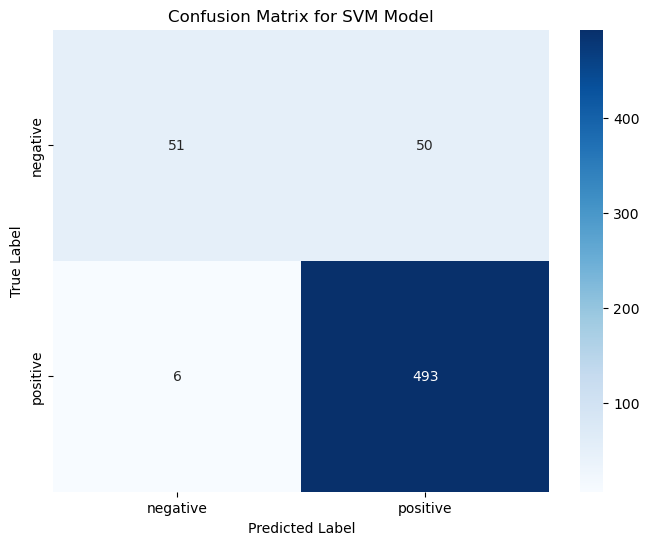

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [13]:
#Decision Tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_title'])  # Features (TF-IDF vectors)
y = df['sentiment_label'].map({'positive': 1, 'negative': 0})  

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Predict 
y_pred1 = dt_model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
precision_macro = precision_score(y_test, y_pred1, average='macro')
recall_macro = recall_score(y_test, y_pred1, average='macro')
f1_macro = f1_score(y_test, y_pred1, average='macro')
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred1))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred1))

print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Recall (Macro): {recall_macro:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")

Accuracy: 0.9283333333333333
Mean Squared Error (MSE): 0.07166666666666667
Mean Absolute Error (MAE): 0.07166666666666667
Precision (Macro): 0.88
Recall (Macro): 0.86
F1-Score (Macro): 0.87


In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       101
           1       0.95      0.96      0.96       499

    accuracy                           0.93       600
   macro avg       0.88      0.86      0.87       600
weighted avg       0.93      0.93      0.93       600



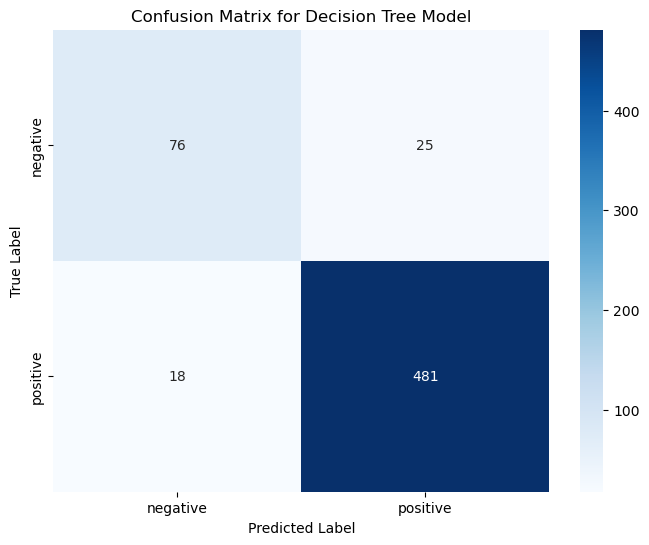

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

df1=df
label_mapping = {'positive': 1, 'negative': 0}
df1['label'] = df1['sentiment_label'].map(label_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df1['title'], df1['label'], test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)

X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input size
max_length = 50  # max length for sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64),
    Dense(2, activation='sigmoid')  # Output layer for 2 classes: positive, negative
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn=rnn_model.fit(X_train_padded, y_train, epochs=10, batch_size=16, validation_data=(X_test_padded, y_test))

Epoch 1/10
150/150 [==============================] - 1s 7ms/step - loss: 0.4926 - accuracy: 0.8096 - val_loss: 0.4549 - val_accuracy: 0.8317
Epoch 2/10
150/150 [==============================] - 1s 7ms/step - loss: 0.4386 - accuracy: 0.8121 - val_loss: 0.4338 - val_accuracy: 0.8317
Epoch 3/10
150/150 [==============================] - 1s 7ms/step - loss: 0.3106 - accuracy: 0.8775 - val_loss: 0.4599 - val_accuracy: 0.8150
Epoch 4/10
150/150 [==============================] - 1s 7ms/step - loss: 0.2048 - accuracy: 0.9292 - val_loss: 0.6241 - val_accuracy: 0.7833
Epoch 5/10
150/150 [==============================] - 1s 7ms/step - loss: 0.1454 - accuracy: 0.9504 - val_loss: 0.5746 - val_accuracy: 0.7817
Epoch 6/10
150/150 [==============================] - 1s 7ms/step - loss: 0.0908 - accuracy: 0.9675 - val_loss: 0.6531 - val_accuracy: 0.7900
Epoch 7/10
150/150 [==============================] - 1s 7ms/step - loss: 0.0637 - accuracy: 0.9846 - val_loss: 0.7455 - val_accuracy: 0.8117
Epoch 

In [65]:
# Evaluate RNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test)
print("RNN Test Accuracy:", rnn_accuracy)

# Get predicted probabilities and convert them to class labels
y_pred_probs = rnn_model.predict(X_test_padded)  
y_pred = np.argmax(y_pred_probs, axis=1)  

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")




19/19 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.8017
RNN Test Accuracy: 0.8016666769981384
19/19 [==============================] - 0s 2ms/step
Precision: 0.90
Recall: 0.86
F1-Score: 0.88


In [60]:
from tensorflow.keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(2, activation='sigmoid')  # Output layer for 2 classes
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm=lstm_model.fit(X_train_padded, y_train, epochs=10, batch_size=16, validation_data=(X_test_padded, y_test))


Epoch 1/10
150/150 [==============================] - 3s 14ms/step - loss: 0.4929 - accuracy: 0.8083 - val_loss: 0.4585 - val_accuracy: 0.8317
Epoch 2/10
150/150 [==============================] - 2s 12ms/step - loss: 0.4860 - accuracy: 0.8125 - val_loss: 0.4599 - val_accuracy: 0.8317
Epoch 3/10
150/150 [==============================] - 2s 13ms/step - loss: 0.4270 - accuracy: 0.8258 - val_loss: 0.3881 - val_accuracy: 0.8317
Epoch 4/10
150/150 [==============================] - 2s 13ms/step - loss: 0.2985 - accuracy: 0.8296 - val_loss: 0.4436 - val_accuracy: 0.6950
Epoch 5/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3051 - accuracy: 0.8675 - val_loss: 0.3991 - val_accuracy: 0.8300
Epoch 6/10
150/150 [==============================] - 2s 13ms/step - loss: 0.3025 - accuracy: 0.8896 - val_loss: 0.3984 - val_accuracy: 0.8367
Epoch 7/10
150/150 [==============================] - 2s 13ms/step - loss: 0.2874 - accuracy: 0.8996 - val_loss: 0.3918 - val_accuracy: 0.8400

In [61]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print("LSTM Test Accuracy:", lstm_accuracy)
y_pred_probs = lstm_model.predict(X_test_padded)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels (0 or 1)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
cm = confusion_matrix(y_test, y_pred)



19/19 [==============================] - 0s 5ms/step - loss: 0.3877 - accuracy: 0.8550
LSTM Test Accuracy: 0.8550000190734863
19/19 [==============================] - 0s 4ms/step
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


In [53]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#CNN
df2 = df

# Tokenize the titles for Word2Vec training
tokenized_titles = [title.split() for title in df2['title']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(tokenized_titles, total_examples=len(tokenized_titles), epochs=10)
import numpy as np

# Initialize the embedding matrix with zeros
vocab_size = 5000  # Limit vocabulary size for tokenizer
embedding_dim = 100  # Embedding dimension size (same as Word2Vec vector size)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fit tokenizer on the titles for neural network input
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['title'])

# Populate embedding matrix with Word2Vec vectors
for word, idx in tokenizer.word_index.items():
    if idx < vocab_size:  # Ensure the index is within the limit
        try:
            embedding_vector = word2vec_model.wv[word]
            embedding_matrix[idx] = embedding_vector
        except KeyError:
            pass  
Xcnn = tokenizer.texts_to_sequences(df2['title'])
Xcnn_padded = pad_sequences(Xcnn, maxlen=50, padding='post')

# Encode labels
label_mapping = {'positive': 1, 'negative': 0}
ycnn = df2['sentiment_label'].map(label_mapping).values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split

# Split into training and test sets
Xcnn_train, Xcnn_test, ycnn_train, ycnn_test = train_test_split(Xcnn_padded, ycnn, test_size=0.2, random_state=42)

# Define the model
def build_cnn_lstm_model():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=50, trainable=False),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(2, activation='sigmoid')  # Output layer for 2 classes: positive, negative
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
cnn_model = build_cnn_lstm_model()
cnn=cnn_model.fit(Xcnn_train, ycnn_train, epochs=10, batch_size=16, validation_split=0.2)



Epoch 1/10
120/120 [==============================] - 1s 4ms/step - loss: 0.5144 - accuracy: 0.8052 - val_loss: 0.5052 - val_accuracy: 0.8083
Epoch 2/10
120/120 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.8130 - val_loss: 0.4962 - val_accuracy: 0.8083
Epoch 3/10
120/120 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.8130 - val_loss: 0.4931 - val_accuracy: 0.8083
Epoch 4/10
120/120 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.8135 - val_loss: 0.4971 - val_accuracy: 0.8083
Epoch 5/10
120/120 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.8135 - val_loss: 0.5010 - val_accuracy: 0.8083
Epoch 6/10
120/120 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.8135 - val_loss: 0.4875 - val_accuracy: 0.8083
Epoch 7/10
120/120 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.8130 - val_loss: 0.4886 - val_accuracy: 0.8083
Epoch 

In [54]:
# Evaluate on test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(Xcnn_test, ycnn_test)
print("CNN with Word2Vec Test Accuracy:", cnn_test_accuracy)
y_pred_probs = cnn_model.predict(Xcnn_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels (0 or 1)

precision = precision_score(ycnn_test, y_pred, average='binary')
recall = recall_score(ycnn_test, y_pred, average='binary')
f1 = f1_score(ycnn_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


19/19 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8317
CNN with Word2Vec Test Accuracy: 0.8316666483879089
19/19 [==============================] - 0s 2ms/step
Precision: 0.83
Recall: 1.00
F1-Score: 0.91


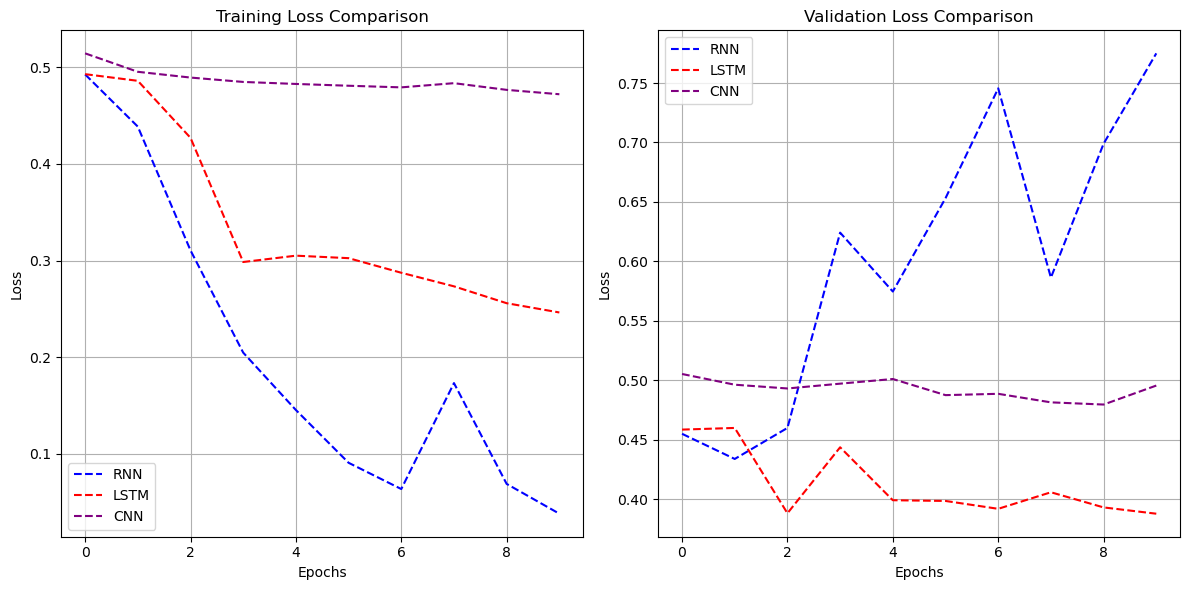

In [83]:
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(rnn.history['loss'], label="RNN", linestyle='--', color='blue')
plt.plot(lstm.history['loss'], label="LSTM", linestyle='--', color='red')
plt.plot(cnn.history['loss'], label="CNN", linestyle='--', color='purple')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(rnn.history['val_loss'], label="RNN", linestyle='--', color='blue')
plt.plot(lstm.history['val_loss'], label="LSTM", linestyle='--', color='red')
plt.plot(cnn.history['val_loss'], label="CNN", linestyle='--', color='purple')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for each model (extract positive class probability)
y_pred_prob_rnn = rnn_model.predict(X_test_padded)[:, 1]  
y_pred_prob_lstm = lstm_model.predict(X_test_padded)[:, 1]  
y_pred_prob_cnn = cnn_model.predict(X_test_padded)[:, 1]  
# Compute Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_rnn = mean_squared_error(y_test, y_pred_prob_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_prob_rnn)

mse_lstm = mean_squared_error(y_test, y_pred_prob_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_prob_lstm)

mse_cnn = mean_squared_error(y_test, y_pred_prob_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_prob_cnn)

# Print results
print(f"🔹 RNN - MSE: {mse_rnn:.4f}, MAE: {mae_rnn:.4f}")
print(f"🔹 LSTM - MSE: {mse_lstm:.4f}, MAE: {mae_lstm:.4f}")
print(f"🔹 CNN - MSE: {mse_cnn:.4f}, MAE: {mae_cnn:.4f}")



19/19 [==============================] - 0s 2ms/step
🔹 RNN - MSE: 0.1753, MAE: 0.2761
🔹 LSTM - MSE: 0.1215, MAE: 0.3027
🔹 CNN - MSE: 0.1909, MAE: 0.4283


Decision Tree gave highest accuracy, now creating data visualizations based on the outcome of Decision Tree

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

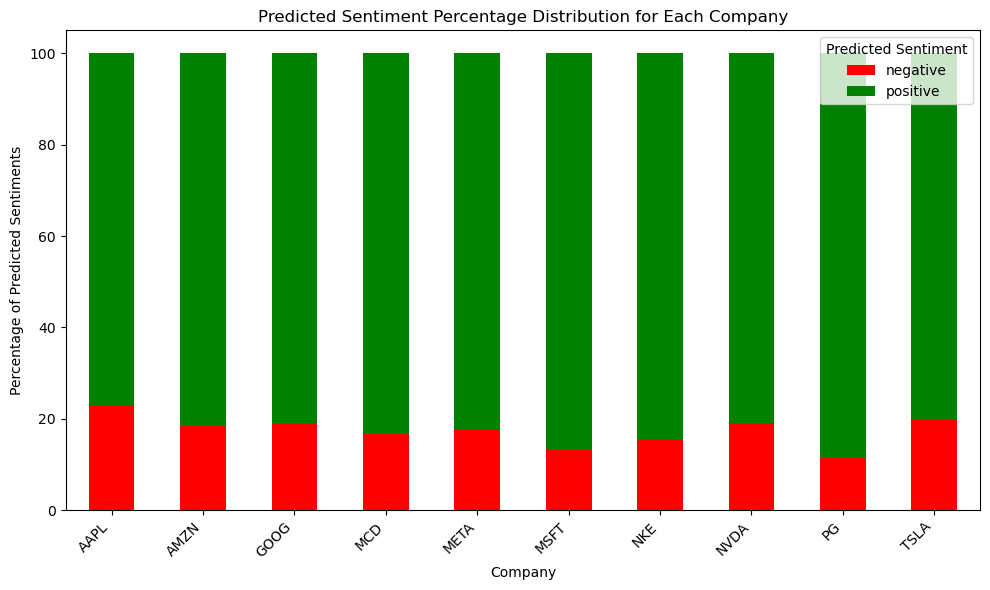

In [78]:
df_train = df.iloc[:2400].copy()
df_test = df.iloc[2400:].copy()
y_pred1_series = pd.Series(y_pred1)

y_pred1_series = y_pred1_series.map({1: 'positive', 0: 'negative'})

df_test['predicted_sentiment'] = y_pred1_series.values

df_train['predicted_sentiment'] = df_train['sentiment_label']

df_all = pd.concat([df_train, df_test], ignore_index=True)

sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

sentiment_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Predicted Sentiment Percentage Distribution for Each Company')
plt.xlabel('Company')
plt.ylabel('Percentage of Predicted Sentiments')
plt.legend(title='Predicted Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [81]:
# 6 different markers
markers = ["o", "s", "D", "^", "v", "*"]  
# o = Circle, s = Square, D = Diamond, ^ = Triangle Up, v = Triangle Down, * = Star

# 6 different colors
colors = ['y', 'b', 'r', 'purple', 'g', 'orange']


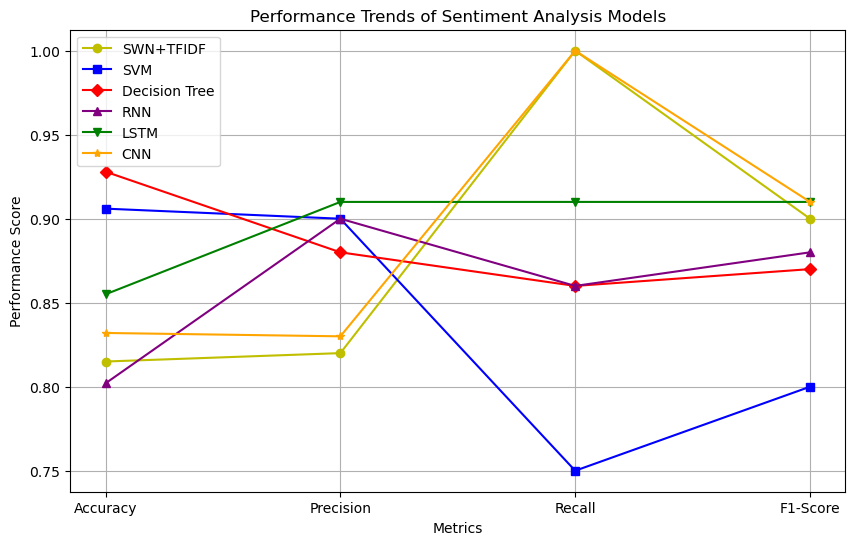

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["SWN+TFIDF", "SVM","Decision Tree","RNN", "LSTM","CNN"]

# Performance metrics (Example values)
accuracy = [0.815, 0.906,0.928,0.802,0.855,0.832]
precision = [0.82, 0.90,0.88,0.90,0.91,0.83]
recall = [1.00, 0.75,0.86,0.86,0.91,1.00]
f1_score = [0.90, 0.80,0.87,0.88,0.91,0.91]
plt.figure(figsize=(10, 6))

# Plot each model's performance across metrics
for i in range(len(models)):
    plt.plot(["Accuracy", "Precision", "Recall", "F1-Score"], 
             [accuracy[i], precision[i], recall[i], f1_score[i]], 
             label=models[i], 
             marker=markers[i], 
             color=colors[i], 
             linestyle='-')

# Labels and title
plt.xlabel("Metrics")
plt.ylabel("Performance Score")
plt.title("Performance Trends of Sentiment Analysis Models")
plt.legend()
plt.grid(True)
plt.show()

